<a href="https://colab.research.google.com/github/Arminsbss/Epidemic-calculator/blob/main/epidemic_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Main SEAIR**

In [ ]:
import numpy as np

def seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days):
    susceptible = population - initial_infected
    exposed = initial_infected
    asymptomatic = 0
    infected = initial_infected
    removed = 0

    # Parameters
    alpha = 1 / incubation_period
    gamma = 1 / recovery_period

    # Arrays to store results
    susceptible_over_time = [susceptible]
    exposed_over_time = [exposed]
    asymptomatic_over_time = [asymptomatic]
    infected_over_time = [infected]
    removed_over_time = [removed]

    # SEAIR model simulation
    for day in range(1, days):
        new_exposed = (r0 * alpha * susceptible * infected) / population
        new_asymptomatic = alpha * exposed
        new_infected = gamma * asymptomatic
        new_removed = gamma * infected

        susceptible -= new_exposed
        exposed += new_exposed - new_asymptomatic
        asymptomatic += new_asymptomatic - new_infected
        infected += new_infected - new_removed
        removed += new_removed

        susceptible_over_time.append(susceptible)
        exposed_over_time.append(exposed)
        asymptomatic_over_time.append(asymptomatic)
        infected_over_time.append(infected)
        removed_over_time.append(removed)

    return (susceptible_over_time, exposed_over_time, asymptomatic_over_time, infected_over_time, removed_over_time)

# Example usage
population = 9039000
r0 = 2.5
incubation_period = 5
recovery_period = 21
initial_infected = 10
days = 200

results = seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)
susceptible_over_time, exposed_over_time, asymptomatic_over_time, infected_over_time, removed_over_time=seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)
print("Susceptible:", results[0][-1])
print("Exposed:", results[1][-1])
print("Asymptomatic:", results[2][-1])
print("Infected:", results[3][-1])
print("Removed:", results[4][-1])



Susceptible: 26531.009908037257
Exposed: 53782.62390959804
Asymptomatic: 1786174.7984069602
Infected: 2433597.283625448
Removed: 4738924.284149953


In [ ]:
dayss=[]
for i in range(0,200):
  dayss.append(i)

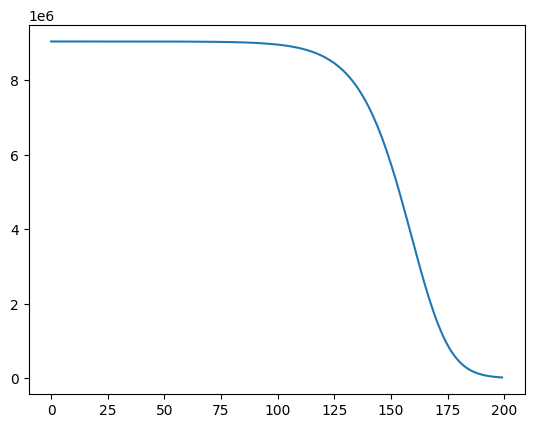

In [ ]:
import matplotlib.pyplot as plt
# x=np.to_array(results)
fig, ax = plt.subplots()
ax.plot(dayss,susceptible_over_time)
plt.show()

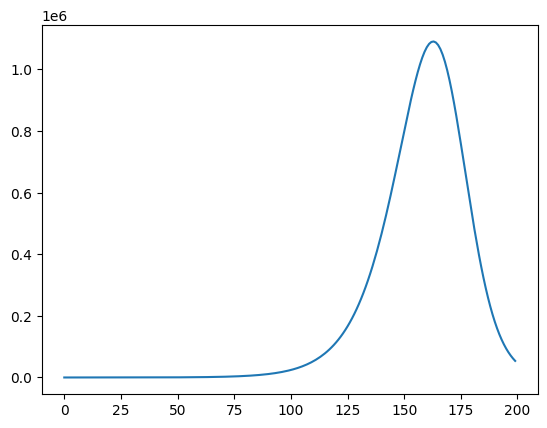

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,exposed_over_time)
plt.show()

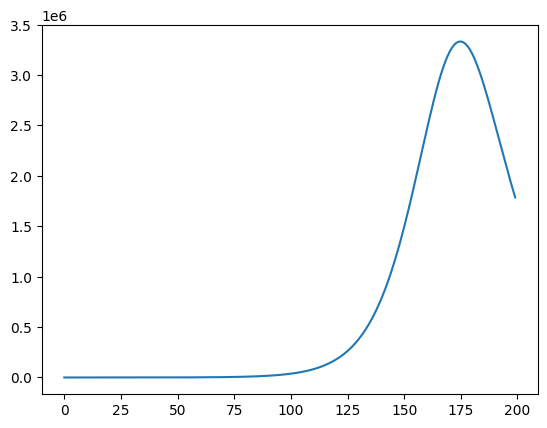

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,asymptomatic_over_time)
plt.show()

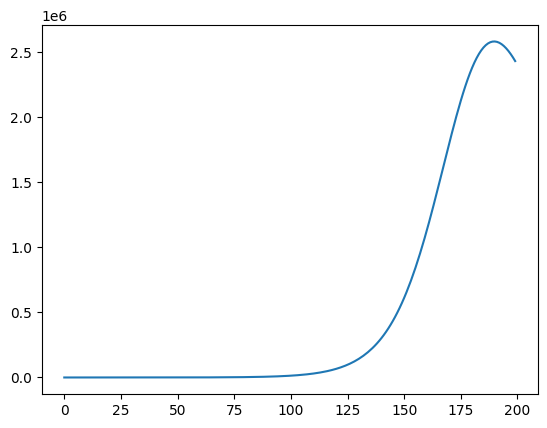

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,infected_over_time)
plt.show()

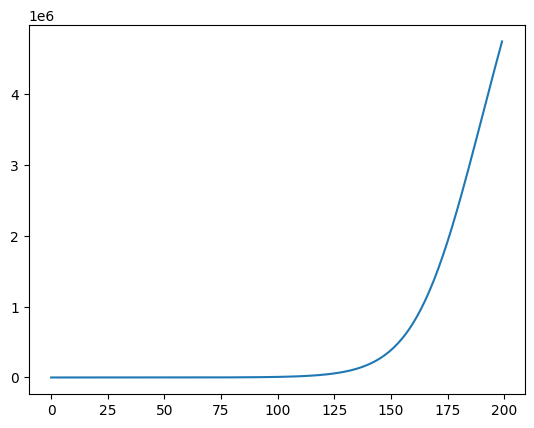

In [ ]:
fig, ax = plt.subplots()
ax.plot(dayss,removed_over_time)
plt.show()

In [ ]:
!pip install PyQt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.0 MB/s eta 0:00:00


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QLineEdit, QPushButton
import matplotlib.pyplot as plt

class EpidemicCalculator(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        layout = QVBoxLayout()

        self.population_label = QLabel("Population:")
        self.population_input = QLineEdit()
        layout.addWidget(self.population_label)
        layout.addWidget(self.population_input)

        self.r0_label = QLabel("R0:")
        self.r0_input = QLineEdit()
        layout.addWidget(self.r0_label)
        layout.addWidget(self.r0_input)

        self.incubation_label = QLabel("Incubation Period:")
        self.incubation_input = QLineEdit()
        layout.addWidget(self.incubation_label)
        layout.addWidget(self.incubation_input)

        self.recovery_label = QLabel("Recovery Period:")
        self.recovery_input = QLineEdit()
        layout.addWidget(self.recovery_label)
        layout.addWidget(self.recovery_input)

        self.infected_label = QLabel("Initial Infected:")
        self.infected_input = QLineEdit()
        layout.addWidget(self.infected_label)
        layout.addWidget(self.infected_input)

        self.days_label = QLabel("Days:")
        self.days_input = QLineEdit()
        layout.addWidget(self.days_label)
        layout.addWidget(self.days_input)

        self.simulate_button = QPushButton("Run Simulation")
        self.simulate_button.clicked.connect(self.run_simulation)
        layout.addWidget(self.simulate_button)

        self.setLayout(layout)
        self.setWindowTitle("Epidemic Calculator")
        self.show()

    def run_simulation(self):
        population = int(self.population_input.text())
        r0 = float(self.r0_input.text())
        incubation_period = int(self.incubation_input.text())
        recovery_period = int(self.recovery_input.text())
        initial_infected = int(self.infected_input.text())
        days = int(self.days_input.text())

        results = seair_simulation(population, r0, incubation_period, recovery_period, initial_infected, days)

        plt.plot(results[0], label='Susceptible')
        plt.plot(results[1], label='Exposed')
        plt.plot(results[2], label='Asymptomatic')
        plt.plot(results[3], label='Infected')
        plt.plot(results[4], label='Removed')
        plt.legend()
        plt.xlabel('Days')
        plt.ylabel('Population')
        plt.title('SEAIR Model Simulation')
        plt.show()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = EpidemicCalculator()
    sys.exit(app.exec_())


# **SEAIR from last paper**

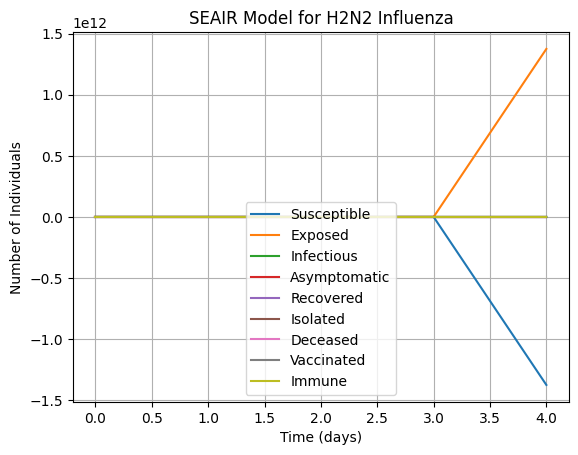

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# SEAIR Model Parameters
betta = 0.85  # Transmission rate
epsilon = 0.50  # Relative infectivity of asymptomatic cases
X = 0.75  # Relative infectivity of isolated symptomatic cases
alpha = 0.52  # Rate of progression from exposed class (median incubation period 1.9 days)
gamma = 0.40  # Rate of progression to recovered class mean infectious period 2.49 days
zetta = 0.03  # Case fatality rate
omega = 0.67  # Proportion of exposed cases that become symptomatic
delta = 0.018  # Rate of progression to death among symptomatic infectious class
tetta = 0.02  # Isolation rate after Day 45, prior to that it is 0
meu = 0.90  # Treatment effectiveness 1-relative reduction in mortality due to treatment
neu = 0.0001  # Global vaccination rate per day after Day 240, prior to that it is 0
etta = 0.02  # Migration rate between cities and regions (location dependent)

# Initial population values
N = 9039000  # Total population
E0 = 1  # Initial number of exposed individuals
I0 = 0  # Initial number of infectious individuals
A0 = 0  # Initial number of asymptomatic individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - E0 - I0 - A0 - R0  # Initial number of susceptible individuals
Is0 = 0  # Initial number of isolated individuals
D0 = 0  # Initial number of deceased individuals
Va0 = 0  # Initial number of vaccinated individuals
Im0 = 0  # Initial number of immune individuals

# Time vector
t_max = 5  # Simulation time (days)
dt = 1  # Time step
t = np.arange(0, t_max, dt)
C=V=a=1

# SEAIR Model Function
def seair_model(S, E, I, A, R, Is, D, Va, Im, t):
    dSdt = -betta * (I + epsilon * A + X * I * S) / N * S - neu * C * V * a
    dEdt = betta * (I + epsilon * A + X * I * S) / N * S - alpha * E
    dIdt = omega * alpha * E - (delta + tetta) * I
    dAdt = (1 - omega) * alpha * E - gamma * A
    dRdt = gamma * I + gamma * A
    dIsdt = tetta * I
    dDdt = delta * I
    dVadt = neu * C * V * a
    dImdt = 0  # Assuming no migration in this simplified model

    return dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt

# Run the SEAIR Model
SEAIR = np.zeros((len(t), 9))
SEAIR[0] = [S0, E0, I0, A0, R0, Is0, D0, Va0, Im0]

for i in range(1, len(t)):
    dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt = seair_model(*SEAIR[i - 1], t[i])
    SEAIR[i] = SEAIR[i - 1] + np.array([dSdt, dEdt, dIdt, dAdt, dRdt, dIsdt, dDdt, dVadt, dImdt]) * dt

# Plotting
plt.plot(t, SEAIR[:, 0], label='Susceptible')
plt.plot(t, SEAIR[:, 1], label='Exposed')
plt.plot(t, SEAIR[:, 2], label='Infectious')
plt.plot(t, SEAIR[:, 3], label='Asymptomatic')
plt.plot(t, SEAIR[:, 4], label='Recovered')
plt.plot(t, SEAIR[:, 5], label='Isolated')
plt.plot(t, SEAIR[:, 6], label='Deceased')
plt.plot(t, SEAIR[:, 7], label='Vaccinated')
plt.plot(t, SEAIR[:, 8], label='Immune')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('SEAIR Model for H2N2 Influenza')
plt.legend()
plt.grid(True)
plt.show()